## API Client ##

### Project Group D , Option C - Part 5

Directions:

Get the jsons generated from your annexed group and plot it. First, try to connect tothe private ip of your annexed group. If it is not possible because of physical issues,then simply use what they generate copying it. If your annexed group cannot giveyou the necessary json, then annotate it, use the json of another group. If there areno jsons from other groups, then use your json from your own API

In [38]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
id_group = "D128"               # Id group 
host_id = "192.168.0.189"       # Private IP of the group
url_s = "http://" + host_id + ":6060/"
endpoint = "get/token"
url_w = url_s + endpoint + "?id="+ id_group

In [40]:
tok = requests.get(url_w).json()
token_id = tok["token"]

In [41]:
endpoint = "get/df"
url_w = url_s + endpoint +  "?tok="+ token_id

In [42]:
df = requests.get(url_w).json()

In [44]:
dicc_data = df["t_d_averages"]


In [45]:
final_df = pd.DataFrame([[key, dicc_data[key]] for key in dicc_data.keys()], columns=['date', 't_d_averages'])

In [46]:
final_df["date"]= pd.to_datetime(final_df["date"], format = "%Y-%m-%d")

In [47]:
final_df.set_index("date", inplace=True)

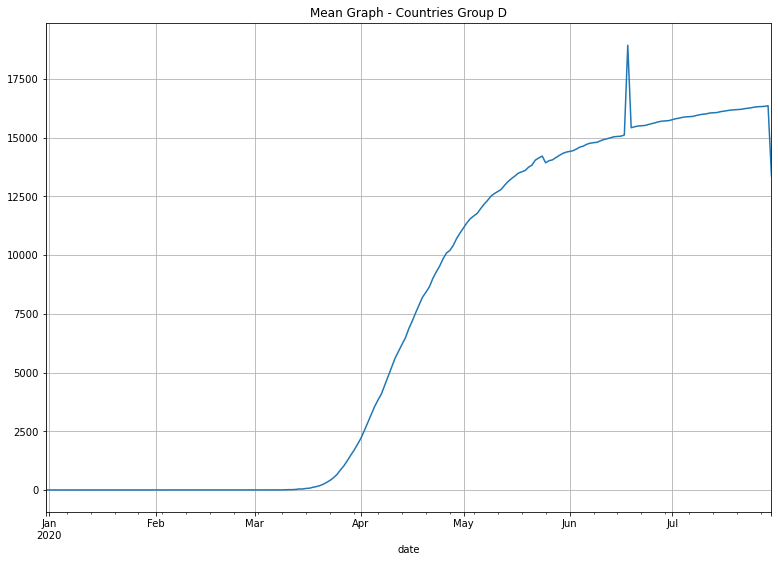

In [48]:
fig = plt.gcf()
#fig.set_size_inches(13.5, 9)        #Se asigna el tamano de la figura
final_df["t_d_averages"].plot(title = "Mean Graph - Countries Group " + id_group[0] , grid = True, figsize=(13,9)) 
